In [5]:
%matplotlib inline

In [6]:
import sys
sys.dont_write_bytecode = True
import seaborn as sns
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)
from ggplot import *
from dataMethods import *
import pandas as pd

In [7]:
import os
from os.path import expanduser

In [8]:
homeDirectory = expanduser("~")
dataDirectory = homeDirectory + os.sep + 'Google Drive/tACS_VWM_ALPHA/data/stim1/'

In [9]:
lstimDataSheets = [dataDirectory + 's2/runData/run1_2016_Jul_27_1158.csv', dataDirectory + 's3/runData/run2_2016_Jul_27_1445.csv', dataDirectory + 's4/runData/run3_2016_Jul_27_1718.csv', dataDirectory + 's5/runData/run2_2016_Aug_01_1225.csv', dataDirectory + 's6/runData/run3_2016_Aug_01_1449.csv']

In [10]:
rstimDataSheets = [dataDirectory + 's2/runData/run3_2016_Jul_27_1251.csv', dataDirectory + 's3/runData/run1_2016_Jul_27_1418.csv', dataDirectory + 's4/runData/run1_2016_Jul_27_1629.csv', dataDirectory + 's5/runData/run3_2016_Aug_01_1249.csv', dataDirectory + 's6/runData/run2_2016_Aug_01_1424.csv']

In [11]:
shamDataSheets = [dataDirectory + 's2/runData/run2_2016_Jul_27_1223.csv', dataDirectory + 's3/runData/run3_2016_Jul_27_1510.csv', dataDirectory + 's4/runData/run2_2016_Jul_27_1654.csv', dataDirectory + 's5/runData/run1_2016_Aug_01_1200.csv', dataDirectory + 's6/runData/run1_2016_Aug_01_1400.csv']

In [12]:
stimTestRuns = [(2,1),(3,2),(4,3),(5,2),(6,3),(2,3),(3,1),(4,1),(5,3),(6,2)]

In [13]:
shamTestRuns = [(2,2),(3,3),(4,2),(5,1),(6,1)]

In [14]:
HFconds = OrderedDict([('t1d0', (1, 0)), ('t1d1', (1, 1)), ('t1d2', (1, 2)), ('t2d0', (2, 0)), ('t2d1', (2, 1)), ('t2d2', (2, 2))])

In [15]:
stimDataIndeces = []
for run in stimTestRuns:
    for key in HFconds:
        stimDataIndeces.append(str(run)+key)

In [16]:
shamDataIndeces = []
for run in shamTestRuns:
    for key in HFconds:
        shamDataIndeces.append(str(run)+key)

In [17]:
dataColumns = ['K', 'HitRate', 'RT', 'dP']

In [18]:
contraData = pd.DataFrame()
ipsiData = pd.DataFrame()
shamData = pd.DataFrame()
i = 0
for sheet in lstimDataSheets:
    contraKs = pashlerK(sheet, 'right')['Kvals']
    contraHitRates = pashlerK(sheet, 'right')['hitRates']
    contraRTs = rtCalc(sheet, 'right')
    contradPrimes = dprime(sheet, 'right')
    ipsiKs = pashlerK(sheet, 'left')['Kvals']
    ipsiHitRates = pashlerK(sheet, 'left')['hitRates']
    ipsiRTs = rtCalc(sheet, 'left')
    ipsidPrimes = dprime(sheet, 'left')
    for key in HFconds:
        cRow = pd.Series([contraKs[key],contraHitRates[key],contraRTs[key],contradPrimes[key]],name=stimDataIndeces[i], index=dataColumns)
        cRow['targs'] = str(HFconds[key][0])
        cRow['dists'] = str(HFconds[key][1])
        contraData = contraData.append(cRow)
        iRow = pd.Series([ipsiKs[key],ipsiHitRates[key],ipsiRTs[key],ipsidPrimes[key]],name=stimDataIndeces[i], index=dataColumns)
        iRow['targs'] = str(HFconds[key][0])
        iRow['dists'] = str(HFconds[key][1])
        ipsiData = ipsiData.append(iRow)
        i += 1

for sheet in rstimDataSheets:
    ipsiKs = pashlerK(sheet, 'right')['Kvals']
    ipsiHitRates = pashlerK(sheet, 'right')['hitRates']
    ipsiRTs = rtCalc(sheet, 'right')
    ipsidPrimes = dprime(sheet, 'right')
    contraKs = pashlerK(sheet, 'left')['Kvals']
    contraHitRates = pashlerK(sheet, 'left')['hitRates']
    contraRTs = rtCalc(sheet, 'left')
    contradPrimes = dprime(sheet, 'left')
    for key in HFconds:
        cRow = pd.Series([contraKs[key],contraHitRates[key],contraRTs[key],contradPrimes[key]],name=stimDataIndeces[i], index=dataColumns)
        cRow['targs'] = str(HFconds[key][0])
        cRow['dists'] = str(HFconds[key][1])
        contraData = contraData.append(cRow)
        iRow = pd.Series([ipsiKs[key],ipsiHitRates[key],ipsiRTs[key],ipsidPrimes[key]],name=stimDataIndeces[i], index=dataColumns)
        iRow['targs'] = str(HFconds[key][0])
        iRow['dists'] = str(HFconds[key][1])
        ipsiData = ipsiData.append(iRow)
        i += 1
   
i = 0
for sheet in shamDataSheets:
    rKs = pashlerK(sheet, 'right')['Kvals']
    rHitRates = pashlerK(sheet, 'right')['hitRates']
    rRTs = rtCalc(sheet, 'right')
    rdPrimes = dprime(sheet, 'right')
    lKs = pashlerK(sheet, 'left')['Kvals']
    lHitRates = pashlerK(sheet, 'left')['hitRates']
    lRTs = rtCalc(sheet, 'left')
    ldPrimes = dprime(sheet, 'left')
    for key in HFconds:
        lRow = pd.Series([lKs[key],lHitRates[key],lRTs[key],ldPrimes[key]],name=shamDataIndeces[i], index=dataColumns)
        lRow['targs'] = str(HFconds[key][0])
        lRow['dists'] = str(HFconds[key][1])
        shamData = shamData.append(lRow)
        rRow = pd.Series([rKs[key],rHitRates[key],rRTs[key],rdPrimes[key]],name=shamDataIndeces[i], index=dataColumns)
        rRow['targs'] = str(HFconds[key][0])
        rRow['dists'] = str(HFconds[key][1])
        shamData = shamData.append(rRow)
        i += 1

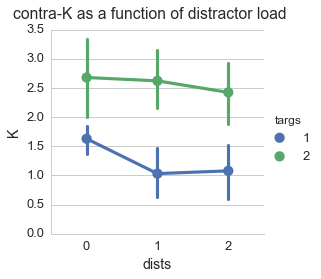

In [19]:
contraKGraph = sns.factorplot(data=contraData,x='dists',y='K',hue='targs')
contraKGraph.fig.suptitle('contra-K as a function of distractor load')
contraKGraph.fig.subplots_adjust(top=.9)

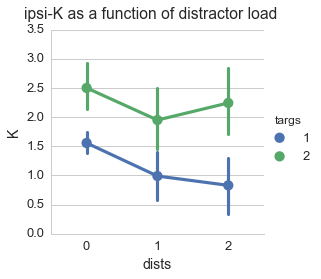

In [20]:
ipsiKGraph = sns.factorplot(data=ipsiData,x='dists',y='K',hue='targs')
ipsiKGraph.fig.suptitle('ipsi-K as a function of distractor load')
ipsiKGraph.fig.subplots_adjust(top=.9)

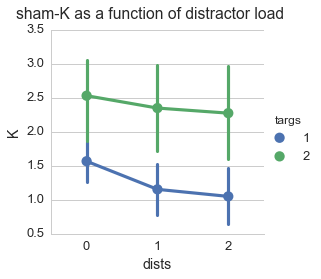

In [21]:
shamKGraph = sns.factorplot(data=shamData,x='dists',y='K',hue='targs')
shamKGraph.fig.suptitle('sham-K as a function of distractor load')
shamKGraph.fig.subplots_adjust(top=.9)

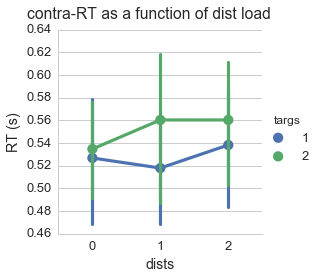

In [22]:
contraRTGraph = sns.factorplot(data=contraData,x='dists',y='RT',hue='targs')
contraRTGraph.set_axis_labels('dists', 'RT (s)')
contraRTGraph.fig.suptitle('contra-RT as a function of dist load')
contraRTGraph.fig.subplots_adjust(top=.9)

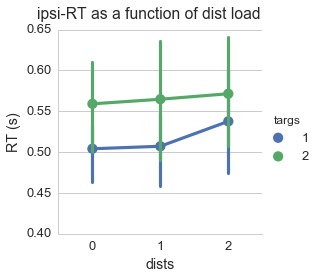

In [23]:
ipsiRTGraph = sns.factorplot(data=ipsiData,x='dists',y='RT',hue='targs')
ipsiRTGraph.set_axis_labels('dists', 'RT (s)')
ipsiRTGraph.fig.suptitle('ipsi-RT as a function of dist load')
ipsiRTGraph.fig.subplots_adjust(top=.9)

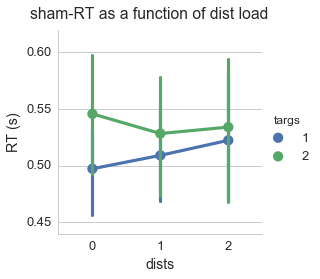

In [24]:
shamRTGraph = sns.factorplot(data=shamData,x='dists',y='RT',hue='targs')
shamRTGraph.set_axis_labels('dists', 'RT (s)')
shamRTGraph.fig.suptitle('sham-RT as a function of dist load')
shamRTGraph.fig.subplots_adjust(top=.9)

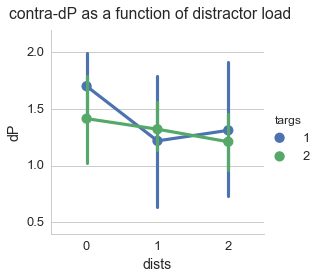

In [25]:
contradPrimeGraph = sns.factorplot(data=contraData,x='dists',y='dP',hue='targs')
contradPrimeGraph.fig.suptitle('contra-dP as a function of distractor load')
contradPrimeGraph.set_axis_labels('dists', 'dP')
contradPrimeGraph.fig.subplots_adjust(top=.9)

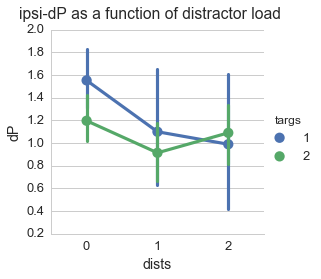

In [26]:
ipsidPrimeGraph = sns.factorplot(data=ipsiData,x='dists',y='dP',hue='targs')
ipsidPrimeGraph.fig.suptitle('ipsi-dP as a function of distractor load')
ipsidPrimeGraph.set_axis_labels('dists', 'dP')
ipsidPrimeGraph.fig.subplots_adjust(top=.9)

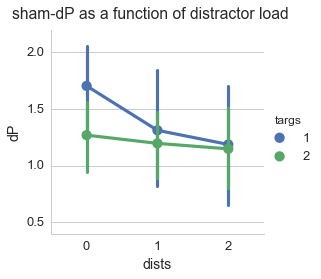

In [27]:
shamdPrimeGraph = sns.factorplot(data=shamData,x='dists',y='dP',hue='targs')
shamdPrimeGraph.fig.suptitle('sham-dP as a function of distractor load')
shamdPrimeGraph.set_axis_labels('dists', 'dP')
shamdPrimeGraph.fig.subplots_adjust(top=.9)

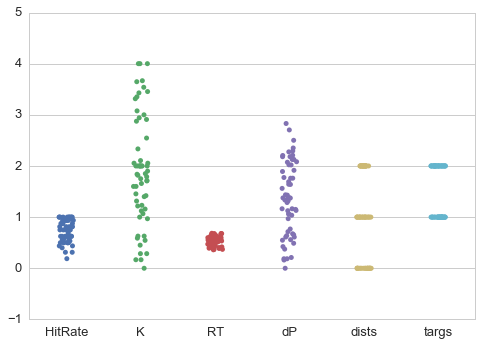

In [28]:
sns.stripplot(data=contraData, jitter=True)

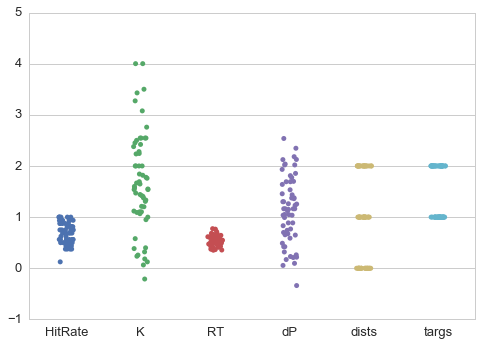

In [29]:
sns.stripplot(data=ipsiData, jitter=True)

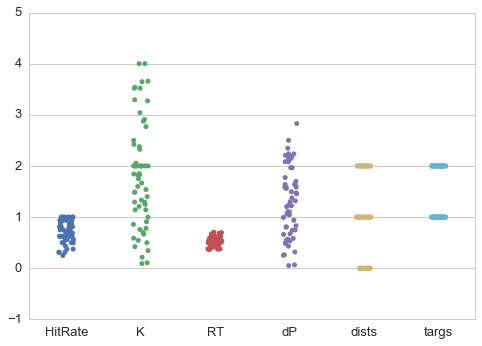

In [30]:
sns.stripplot(data=shamData, jitter=True)